In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Praktikum 3/Data/day.csv')

# Cetak header data (5 baris data) dari file
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Variabel dependen (target)
y = df['cnt']

# Variabel independen
X = df[['season','yr','mnth','holiday','weekday',
        'workingday','weathersit','temp','atemp','hum','windspeed']]

In [ ]:
# Split data untuk training & testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
cat_features = ['season','mnth','weekday','weathersit']
num_features = ['yr','holiday','workingday','temp','atemp','hum','windspeed']

# One-hot encoding untuk fitur kategori
encoder = OneHotEncoder(drop='first')
X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

# Gabungkan dengan fitur numerik
X_train_num = X_train[num_features].values
X_test_num = X_test[num_features].values

X_train_proc = np.hstack([X_train_num, X_train_cat.toarray()])
X_test_proc = np.hstack([X_test_num, X_test_cat.toarray()])

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_proc)
X_test_scaled = scaler.transform(X_test_proc)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model_lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")


MAE  : 583.02
RMSE : 796.46
R²   : 0.842


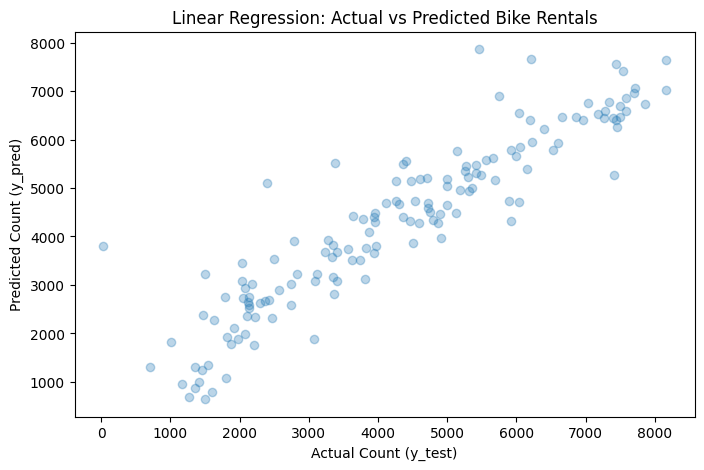

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Count (y_test)")
plt.ylabel("Predicted Count (y_pred)")
plt.title("Linear Regression: Actual vs Predicted Bike Rentals")
plt.show()

In [ ]:
coef = pd.Series(model_lr.coef_, name="Coefficient")

# Ambil nama fitur setelah one-hot encoding
encoded_features = encoder.get_feature_names_out(cat_features)
all_features = num_features + list(encoded_features)

coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coef})
coef_df.sort_values('Coefficient', ascending=False).head(10)

,Feature,Coefficient
0,yr,990.336033
9,season_4,707.942306
3,temp,686.298246
7,season_2,416.765572
8,season_3,358.625781
17,mnth_9,237.178202
4,atemp,195.466120
26,weekday_6,173.287020
13,mnth_5,157.977155
11,mnth_3,146.105323
